<a href="https://colab.research.google.com/github/mgultekin/Building-Generative-AI-Applications-with-Gradio/blob/main/ImageCaptioningApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Object Detection App


https://huggingface.co/docs/transformers.js/en/pipelines#pipeline-options

In [1]:
# Install necessary packages

!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 695.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.4 MB

In [2]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
import os
import io
import IPython
from IPython.display import Image, display, HTML
from PIL import Image
import base64



In [4]:
# Example to use the 'transformers' library for text classificationfrom transformers import pipeline
from transformers import pipeline
pipe = pipeline('object-detection')

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

In [5]:
# Sample image URL for demonstration
image_url = "https://free-images.com/lg/0b0f/tennis_player_caroline_wozniacki.jpg"
display(IPython.display.Image(url=image_url))

In [6]:

from PIL import Image,ImageDraw
import requests
from io import BytesIO

# Load an image from a URL
#image_url = "https://example.com/path/to/your/image.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Perform object detection
results = pipe(image)

In [7]:
results

[{'score': 0.7479415535926819,
  'label': 'backpack',
  'box': {'xmin': 22, 'ymin': 30, 'xmax': 212, 'ymax': 125}},
 {'score': 0.9989632368087769,
  'label': 'tennis racket',
  'box': {'xmin': 160, 'ymin': 455, 'xmax': 195, 'ymax': 677}},
 {'score': 0.9997134804725647,
  'label': 'person',
  'box': {'xmin': 163, 'ymin': 124, 'xmax': 505, 'ymax': 762}},
 {'score': 0.9807536005973816,
  'label': 'sports ball',
  'box': {'xmin': 473, 'ymin': 297, 'xmax': 503, 'ymax': 325}}]

In [8]:
# Draw bounding box definition
def draw_bounding_box(im, score, label, xmin, ymin, xmax, ymax, index, num_boxes):
	""" Draw a bounding box. """

	print(f"Drawing bounding box {index} of {num_boxes}...")

	# Draw the actual bounding box
	im_with_rectangle = ImageDraw.Draw(im)
	im_with_rectangle.rounded_rectangle((xmin, ymin, xmax, ymax), outline = "red", width = 5, radius = 10)

	# Draw the label
	im_with_rectangle.text((xmin+35, ymin-25), label, fill="white", stroke_fill = "red")

	# Return the intermediate result
	return im

In [9]:
def draw_boxes(image, results):
    num_boxes = len(results)
    index = 0

    # Draw bounding box for each result
    for bounding_box in results:

      # Get actual box
      box = bounding_box["box"]

      # Draw the bounding box
      im = draw_bounding_box(image, bounding_box["score"], bounding_box["label"],\
        box["xmin"], box["ymin"], box["xmax"], box["ymax"], index, num_boxes)

      # Increase index by one
      index += 1

In [10]:
draw_boxes(image, results)

Drawing bounding box 0 of 4...
Drawing bounding box 1 of 4...
Drawing bounding box 2 of 4...
Drawing bounding box 3 of 4...


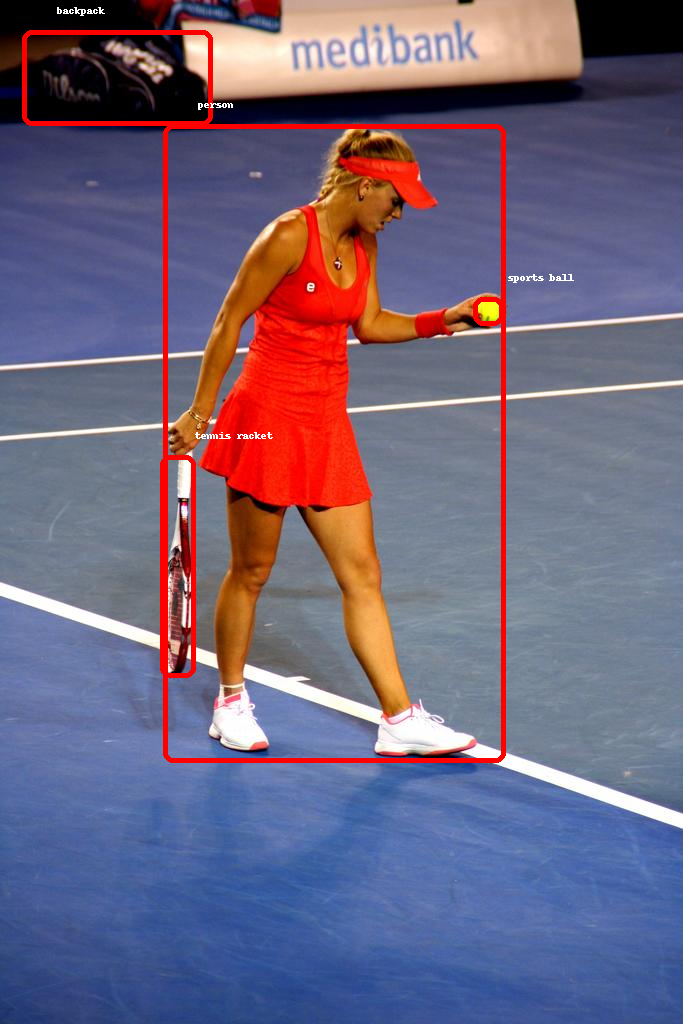

In [11]:
image

#Gradio Interface

In [12]:

# Function to convert PIL image to base64 string
#def image_to_base64_str(pil_image):
#    byte_arr = io.BytesIO()
#    pil_image.save(byte_arr, format='PNG')
#    byte_arr = byte_arr.getvalue()
#    return str(base64.b64encode(byte_arr).decode('utf-8'))

def detect(image):
    #base64_image = image_to_base64_str(image)
    results = pipe(image)
    draw_boxes(image, results)
    return image

In [13]:
# Create a Gradio interface to interactively demonstrate the image captioning functionality
import gradio as gr


gr.close_all()
demo = gr.Interface(fn=detect,
                    inputs=[gr.Image(label="Upload image", type="pil")],
                    outputs=[gr.Image(label="Detected image", type="pil")],
                    title="Object detection",
                    description="Object detection model demo",
                    allow_flagging="never")

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d16112647083c27b9b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# Close all Gradio interfaces after launching the demo
gr.close_all()

Closing server running on port: 7860
